In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Movie Industry Data Project
Data Cleaning, Inputation, Analytics, Correlation, and Visualization

In [2]:
# Reading the data

movies_df = pd.read_csv("movies.csv")
display(movies_df)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# Seeing basic informations about the data

movies_df.info()

movies_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Missing Value Treatment

Our primary objective is to make the dataset robust by applying data imputation techniques and reducing the count of null values to zero or near-zero.

In [4]:
## Looking at the missing data
movies_df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# The 'released' column is redundant. Since 'year' and 'country' columns already capture the necessary information
# so we can safely drop the 'released' column without losing any valuable data.

movies_df = movies_df.drop('released', axis=1)
display(movies_df)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [6]:
# renaming column 'year' to 'release_year', 'score' to 'imdb_score', 'star' to 'lead_actor', 'gross' to 'gross_income', 'runtime' to 'runtime_min'

movies_df = movies_df.rename(columns={'year':'release_year', 'score':'imdb_score', 'star':'lead_actor', 'gross':'gross_income', 'runtime':'runtime_min'})
movies_df.head()

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Check for missing values in the 'runtime_min' column for filling them manually

movies_df[movies_df['runtime_min'].isnull()]

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
5728,Saw: The Final Chapter,R,Crime,2010,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
6195,One for the Money,PG-13,Action,2012,5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


In [8]:
# Manually refilling as much data as we can to improve the dataset

movies_df.loc[movies_df.index[5728], 'country'] = 'Canada' 
movies_df.loc[movies_df.index[5728], 'budget'] = 17000000
movies_df.loc[movies_df.index[5728], 'gross_income'] = 136000000
movies_df.loc[movies_df.index[5728], 'company'] = 'Lionsgate Home Entertainment'
movies_df.loc[movies_df.index[5728], 'runtime_min'] = 90

movies_df.loc[movies_df.index[5730], 'country'] = 'United States' 
movies_df.loc[movies_df.index[5730], 'budget'] = 150000000
movies_df.loc[movies_df.index[5730], 'gross_income'] = 139789765
movies_df.loc[movies_df.index[5730], 'company'] = 'Universal Pictures'
movies_df.loc[movies_df.index[5730], 'runtime_min'] = 103

movies_df.loc[movies_df.index[6195],'runtime_min']=120

movies_df.loc[movies_df.index[7665],'gross_income']=1000000
movies_df.loc[movies_df.index[7665],'runtime_min']=120

In [9]:
# Checking
movies_df.loc[movies_df.index[5728]]

name                  Saw: The Final Chapter
rating                                     R
genre                                  Crime
release_year                            2010
imdb_score                               5.6
votes                                93000.0
director                      Kevin Greutert
writer                        Patrick Melton
lead_actor                        Tobin Bell
country                               Canada
budget                            17000000.0
gross_income                     136000000.0
company         Lionsgate Home Entertainment
runtime_min                             90.0
Name: 5728, dtype: object

In [10]:
# We begin by addressing numerical columns with low missing counts, such as 'imdb_score' and 'votes'.
# Given that IMDb scores tend to cluster between 5 and 8, the **median** is chosen over the mean or mode.
# The median effectively represents the central tendency and is better at handling potentially skewed rating distributions.

movies_df['imdb_score'] = movies_df['imdb_score'].fillna(movies_df['imdb_score'].median())
movies_df['votes'] = movies_df['votes'].fillna(movies_df['votes'].median())

In [11]:
# Now i will handle writer, lead_actor, and country, manually as they are only 5.
movies_df[movies_df['writer'].isnull() | movies_df['lead_actor'].isnull() | movies_df['country'].isnull()]

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
474,The Business of Show Business,NaN,History,1983,8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0
1820,The Garden,Unrated,Drama,1990,6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7615,Clinton Road,NaN,Horror,2019,5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0
7655,Legend of Deification,TV-PG,Animation,2020,6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [12]:
movies_df.loc[movies_df.index[474], 'lead_actor'] = 'Tom Logan'
movies_df.loc[movies_df.index[7615], 'country'] = 'United States'
movies_df.loc[movies_df.index[7655], 'budget'] = 100000000
movies_df.loc[movies_df.index[1820], 'writer'] = 'Derek Jarman'
movies_df.loc[movies_df.index[5834], 'writer'] = 'Ansel Faraj'
movies_df.loc[movies_df.index[7655], 'writer'] = 'Qianying Xie'

In [13]:
# Looking to see the progress
movies_df.isnull().sum()

name               0
rating            77
genre              0
release_year       0
imdb_score         0
votes              0
director           0
writer             0
lead_actor         0
country            0
budget          2168
gross_income     186
company           15
runtime_min        0
dtype: int64

Imputation Strategy: Rating (Mode per Genre)

The **'rating'** column has 77 null values. Our imputation strategy is to use the **mode** specific to each film's **genre**.

This conditional approach ensures high accuracy: for instance, Horror movies predominantly receive 'R' ratings, and Action films are most likely will be PG, PG13, X or R rated depending uppon the movie, but it is certain that it will be one of those 4. By taking the most frequently observed rating within a specific genre, we maintain the integrity and **contextual relevance** of our dataset.

In [14]:
movies_df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [15]:
movies_df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [16]:
# Fill missing RATINGS with the mode for each GENRE using a for-loop
for genre in movies_df['genre'].unique():
    category_mode = movies_df[movies_df['genre'] == genre]['rating'].mode()
    
    imputation_value = category_mode.get(0, 'Not Rated')

    print(f'Genre: {genre}, Mode Rating: {imputation_value}')

    movies_df.loc[(movies_df['genre'] == genre) & (movies_df['rating'].isnull()), 'rating'] = imputation_value

Genre: Drama, Mode Rating: R
Genre: Adventure, Mode Rating: PG
Genre: Action, Mode Rating: R
Genre: Comedy, Mode Rating: R
Genre: Horror, Mode Rating: R
Genre: Biography, Mode Rating: R
Genre: Crime, Mode Rating: R
Genre: Fantasy, Mode Rating: R
Genre: Family, Mode Rating: PG
Genre: Sci-Fi, Mode Rating: PG-13
Genre: Animation, Mode Rating: PG
Genre: Romance, Mode Rating: PG
Genre: Music, Mode Rating: R
Genre: Western, Mode Rating: R
Genre: Thriller, Mode Rating: R
Genre: History, Mode Rating: Not Rated
Genre: Mystery, Mode Rating: R
Genre: Sport, Mode Rating: PG-13
Genre: Musical, Mode Rating: Not Rated


In [17]:
# Getting very close to a complete dataset
movies_df.isnull().sum()

name               0
rating             0
genre              0
release_year       0
imdb_score         0
votes              0
director           0
writer             0
lead_actor         0
country            0
budget          2168
gross_income     186
company           15
runtime_min        0
dtype: int64

- After analyzing the dataset for a bit, I observed that movie budgets have increased over the period of time (this is obvious), but it also highly depends on the genre of the movie.
- For example, sci-fi, horror, and action movies usually take more budget compared to drama, biography, and family movies. And this has grown in the same way over the years.
- So by taking this into consideration, we can take the median of the budget by genre <br>
- By this, we will get good enough data for any type of correlation or visualization.

Imputation Strategy: Budget (Median by Genre)

Initial analysis confirms that movie budgets have generally increased over time, but the budget size is highly dependent on the film's genre.

For example, high-production genres like Sci-Fi and Action typically require larger budgets compared to genres such as Drama or Biography. To account for this crucial correlation and improve data quality, we will impute missing budget values using the **median budget specific to each genre**.

This approach provides a reliable and contextually accurate value for any subsequent correlation analysis or visualization.

In [18]:
# Convert the 'budget' column to numeric, setting invalid values to NaN
movies_df['budget'] = movies_df['budget'].astype('float64')

In [19]:
# Iterate through each unique movie category
for genre in movies_df['genre'].unique():
    genre_median_budget = movies_df[movies_df['genre'] == genre]['budget'].median()

    print(f"Median budget for {genre} is {genre_median_budget}")
    movies_df.loc[(movies_df['genre'] == genre) & (movies_df['budget'].isnull()), 'budget'] = genre_median_budget

Median budget for Drama is 15000000.0
Median budget for Adventure is 25000000.0
Median budget for Action is 40000000.0
Median budget for Comedy is 17000000.0
Median budget for Horror is 8750000.0
Median budget for Biography is 20000000.0
Median budget for Crime is 15000000.0
Median budget for Fantasy is 9000000.0
Median budget for Family is 17000000.0
Median budget for Sci-Fi is 13000000.0
Median budget for Animation is 70000000.0
Median budget for Romance is 22000000.0
Median budget for Music is nan
Median budget for Western is 10500000.0
Median budget for Thriller is 8000000.0
Median budget for History is 323562.0
Median budget for Mystery is 24000000.0
Median budget for Sport is nan
Median budget for Musical is nan


c:\Users\mathe\OneDrive\Documentos\VSCODE-Workspace\Python Impressionador\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mathe\OneDrive\Documentos\VSCODE-Workspace\Python Impressionador\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mathe\OneDrive\Documentos\VSCODE-Workspace\Python Impressionador\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Now filling gross_incom with the help of IMDB_score. Lets take the median here as well**

In [20]:
# Iterate through each unique IMDb score available
for current_score in movies_df['imdb_score'].unique():
    score_median_income = movies_df[movies_df['imdb_score'] == current_score]['gross_income'].median()
    
    print(f"Median income for score {current_score} is {score_median_income}")
    
    score_condition = (movies_df['imdb_score'] == current_score)
    null_income_condition = (movies_df['gross_income'].isnull())
    
    movies_df.loc[score_condition & null_income_condition, 'gross_income'] = score_median_income
    

Median income for score 8.4 is 330951875.5
Median income for score 5.8 is 16176732.0
Median income for score 8.7 is 502369956.0
Median income for score 7.7 is 32901136.0
Median income for score 7.3 is 23511542.5
Median income for score 6.4 is 22905522.0
Median income for score 7.9 is 34085749.0
Median income for score 8.2 is 83850267.0
Median income for score 6.8 is 18564904.0
Median income for score 7.0 is 19439764.0
Median income for score 6.1 is 19127595.0
Median income for score 5.3 is 19304319.5
Median income for score 7.1 is 18553948.0
Median income for score 7.2 is 19978189.0
Median income for score 6.6 is 23389975.0
Median income for score 6.9 is 21998421.5
Median income for score 6.5 is 22313201.0
Median income for score 6.7 is 18535228.5
Median income for score 5.0 is 17579366.0
Median income for score 6.2 is 23351296.0
Median income for score 5.4 is 12701725.0
Median income for score 6.3 is 22323612.0
Median income for score 6.0 is 18869631.0
Median income for score 5.9 is 1

In [21]:
movies_df.isnull().sum()

name             0
rating           0
genre            0
release_year     0
imdb_score       0
votes            0
director         0
writer           0
lead_actor       0
country          0
budget           4
gross_income     0
company         15
runtime_min      0
dtype: int64

Again, i manually researched and imputed the 15 missing values (or used 'Unknown Company' where data was unavailable) to retain data integrity

In [22]:
movies_df[movies_df['company'].isnull()]

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
408,A Night in Heaven,R,Drama,1983,4.3,1200.0,John G. Avildsen,Joan Tewkesbury,Christopher Atkins,United States,15000000.0,5563663.0,NaN,83.0
464,White Star,R,Drama,1983,6.0,235.0,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,100000.0,18869631.0,NaN,92.0
469,Last Plane Out,PG,Action,1983,4.5,131.0,David Nelson,Ernest Tidyman,Jan-Michael Vincent,United States,40000000.0,12148050.5,NaN,92.0
633,The Bear,PG,Biography,1984,6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
969,Modern Girls,PG-13,Comedy,1986,5.8,1300.0,Jerry Kramer,Laurie Craig,Daphne Zuniga,United States,17000000.0,604849.0,NaN,84.0
1033,P.O.W. the Escape,R,Action,1986,5.0,533.0,Gideon Amir,Malcolm Barbour,David Carradine,United States,40000000.0,2497233.0,NaN,90.0
1572,Heart of Dixie,PG,Drama,1989,5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0
1594,Lost Angels,R,Drama,1989,6.0,881.0,Hugh Hudson,Michael Weller,Donald Sutherland,United States,15000000.0,1247946.0,NaN,116.0
1630,Staying Together,R,Comedy,1989,6.2,761.0,Lee Grant,Monte Merrick,Sean Astin,United States,17000000.0,4348025.0,NaN,91.0
1806,Streets,R,Action,1990,5.7,712.0,Katt Shea,Andy Ruben,Christina Applegate,United States,40000000.0,1510053.0,NaN,85.0


In [23]:
# Manual Imputation for 'company' based on online search

# 1983 - 1990 Films
movies_df.loc[movies_df.index[408], 'company'] = 'Twentieth Century-Fox'
movies_df.loc[movies_df.index[464], 'company'] = 'Roland Klick Filmproduktion'
movies_df.loc[movies_df.index[469], 'company'] = 'New World Pictures'
movies_df.loc[movies_df.index[633], 'company'] = 'Embassy Pictures'
movies_df.loc[movies_df.index[969], 'company'] = 'Atlantic Entertainment Group'
movies_df.loc[movies_df.index[1033], 'company'] = 'The Cannon Group'
movies_df.loc[movies_df.index[1572], 'company'] = 'Orion Pictures'
movies_df.loc[movies_df.index[1594], 'company'] = 'Orion Pictures'
movies_df.loc[movies_df.index[1630], 'company'] = 'MGM'
movies_df.loc[movies_df.index[1806], 'company'] = 'Concorde Pictures'

# 2019 - 2020 Films
movies_df.loc[movies_df.index[7599], 'company'] = 'Alsina 427'
movies_df.loc[movies_df.index[7657], 'company'] = 'We Pictures'
movies_df.loc[movies_df.index[7662], 'company'] = 'Unknown Company'
movies_df.loc[movies_df.index[7663], 'company'] = 'Unknown Company'
movies_df.loc[movies_df.index[7666], 'company'] = 'Reel Unicorn Productions'

print("Company imputation complete")

Company imputation complete


Since only 4 'budget' NaNs remain (from genres where median was not available), we remove these few remaining rows to ensure the DataFrame is completely free of missing values.

In [24]:
movies_df = movies_df.dropna()

In [25]:
#Now we have a complete dataset with no missing values.
movies_df.isnull().sum()

name            0
rating          0
genre           0
release_year    0
imdb_score      0
votes           0
director        0
writer          0
lead_actor      0
country         0
budget          0
gross_income    0
company         0
runtime_min     0
dtype: int64

## Some Data Cleaning

In [26]:
# Data types for our columns
movies_df.dtypes

name             object
rating           object
genre            object
release_year      int64
imdb_score      float64
votes           float64
director         object
writer           object
lead_actor       object
country          object
budget          float64
gross_income    float64
company          object
runtime_min     float64
dtype: object

In [27]:
# Change data type of columns

movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['gross_income'] = movies_df['gross_income'].astype('int64')

In [28]:
# Checking for duplicate values ​​ONLY in the 'name' column.
duplicates_name = movies_df['name'].duplicated()
sum_duplicates = duplicates_name.sum()

print(f"Number of movies with duplicate names: {sum_duplicates}")

Number of movies with duplicate names: 156


In [29]:
movies_df[movies_df['name'].duplicated()].sort_values('name')

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
5712,A Nightmare on Elm Street,R,Crime,2010,5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000,115695182,New Line Cinema,95.0
7556,After the Wedding,PG-13,Drama,2019,6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,15000000,2790019,Sony Pictures Classics,112.0
7481,Aladdin,PG,Adventure,2019,6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000,1050693953,Walt Disney Pictures,128.0
7486,Anna,R,Action,2019,6.6,69000.0,Luc Besson,Luc Besson,Sasha Luss,France,40000000,31626978,Summit Entertainment,118.0
6390,Anna,R,Drama,2013,6.5,22000.0,Jorge Dorado,Guy Holmes,Mark Strong,Spain,7000000,1257142,The Safran Company,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,Unforgettable,R,Drama,2017,5.1,15000.0,Denise Di Novi,Christina Hodson,Rosario Dawson,United States,12000000,17768012,DiNovi Pictures,100.0
7254,Venom,PG-13,Action,2018,6.7,387000.0,Ruben Fleischer,Jeff Pinkner,Tom Hardy,China,100000000,856085151,Avi Arad Productions,112.0
4799,Venom,R,Horror,2005,4.6,9700.0,Jim Gillespie,Flint Dille,Agnes Bruckner,United States,8750000,881779,Dimension Films,87.0
3708,Where the Heart Is,PG-13,Comedy,2000,6.7,32000.0,Matt Williams,Lowell Ganz,Natalie Portman,United States,15000000,40863718,Twentieth Century Fox,120.0


Even though there are columns with duplicate names, which is expected since there are many films with the same titles, the other columns allow you to differentiate between the films.

In [30]:
movies_df.sort_values(by='gross_income', inplace=True, ascending=False)

## Correlation and Visualization: Data Exploration

This section focus on exploring relationships between variables through correlation analysis and visual representation.

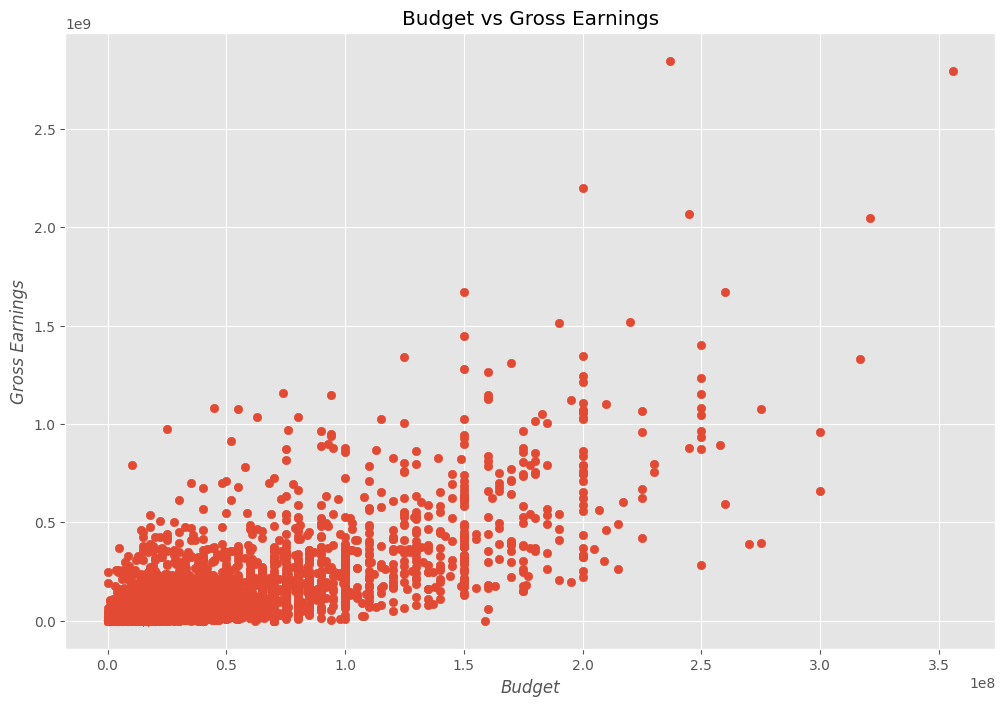

In [31]:
# Scatter plot with budget vs gross_income

plt.scatter(x=movies_df['budget'], y=movies_df['gross_income'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget', fontstyle='italic')
plt.ylabel('Gross Earnings', fontstyle='italic')
plt.show()

In [32]:
movies_df.head()

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


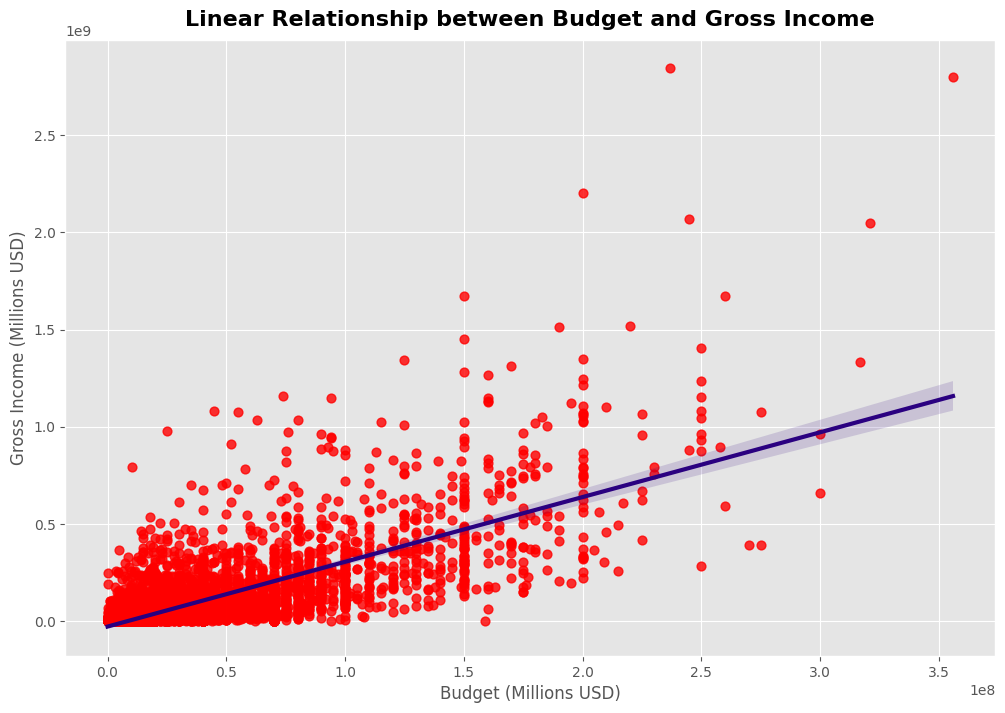

In [33]:
# Plot Budget vs Gross Income using seaborn

fig, ax = plt.subplots()
sns.regplot(x='budget', 
            y='gross_income', 
            data=movies_df, 
            scatter_kws={"color": "red", 'alpha': 0.8, 's': 40},
            line_kws={"color": "#2A0080", 'linewidth': 3},
            ax=ax)

ax.set_title('Linear Relationship between Budget and Gross Income', fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel('Budget (Millions USD)', fontsize=12)
ax.set_ylabel('Gross Income (Millions USD)', fontsize=12)
plt.show()

Looking at correlation

In [34]:
# taking only numeric values
df_numeric_values = movies_df.select_dtypes(include=['int64', 'float64'])

In [35]:
df_numeric_values.corr(method='pearson') # default method used

,release_year,imdb_score,votes,budget,gross_income,runtime_min
release_year,1.000000,0.097684,0.222998,0.292989,0.260053,0.120427
imdb_score,0.097684,1.000000,0.409625,0.060469,0.186971,0.398678
votes,0.222998,0.409625,1.000000,0.454912,0.632070,0.309502
budget,0.292989,0.060469,0.454912,1.000000,0.737147,0.263194
gross_income,0.260053,0.186971,0.632070,0.737147,1.000000,0.245363
runtime_min,0.120427,0.398678,0.309502,0.263194,0.245363,1.000000


In [36]:
df_numeric_values.corr(method='kendall')

,release_year,imdb_score,votes,budget,gross_income,runtime_min
release_year,1.000000,0.067474,0.332194,0.186426,0.197506,0.097196
imdb_score,0.067474,1.000000,0.300794,-0.011242,0.088640,0.282872
votes,0.332194,0.300794,1.000000,0.282437,0.531815,0.198387
budget,0.186426,-0.011242,0.282437,1.000000,0.399597,0.180606
gross_income,0.197506,0.088640,0.531815,0.399597,1.000000,0.167445
runtime_min,0.097196,0.282872,0.198387,0.180606,0.167445,1.000000


In [37]:
df_numeric_values.corr(method='spearman')

,release_year,imdb_score,votes,budget,gross_income,runtime_min
release_year,1.000000,0.098818,0.471131,0.263136,0.289500,0.143014
imdb_score,0.098818,1.000000,0.429174,-0.016385,0.129843,0.398873
votes,0.471131,0.429174,1.000000,0.404747,0.724497,0.290431
budget,0.263136,-0.016385,0.404747,1.000000,0.554096,0.257332
gross_income,0.289500,0.129843,0.724497,0.554096,1.000000,0.244733
runtime_min,0.143014,0.398873,0.290431,0.257332,0.244733,1.000000


**Summary of Correlation Analysis**

The three correlation methods (Pearson, Spearman, and Kendall) consistently point to the same two primary relationships impacting financial success:

1.  **Financial Success (`gross_income`):**
    * The strongest linear correlation is observed between **`budget` and `gross_income`** (Pearson: 0.737). This suggests that high production cost strongly translates to high revenue
    * The relationship between **`votes` and `gross_income`** is also very strong (Spearman: 0.724), indicating that audience engagement and popularity (votes) are crucial predictors of financial ranking

2.  **Quality and Duration (`imdb_score` and `runtime_min`):**
    * The perceived quality of a movie (`imdb_score`) has a relatively weak correlation with financial variables (`budget` and `gross_income`)
    * Film duration (`runtime_min`) shows a moderate positive correlation with the score (`imdb_score`) (Pearson: 0.399), suggesting that longer films tend to be rated slightly higher

**Overall Conclusion:** For this dataset, the most impactful variables on revenue are **`budget`** (linearly) and **`votes`** (rank-based popularity)

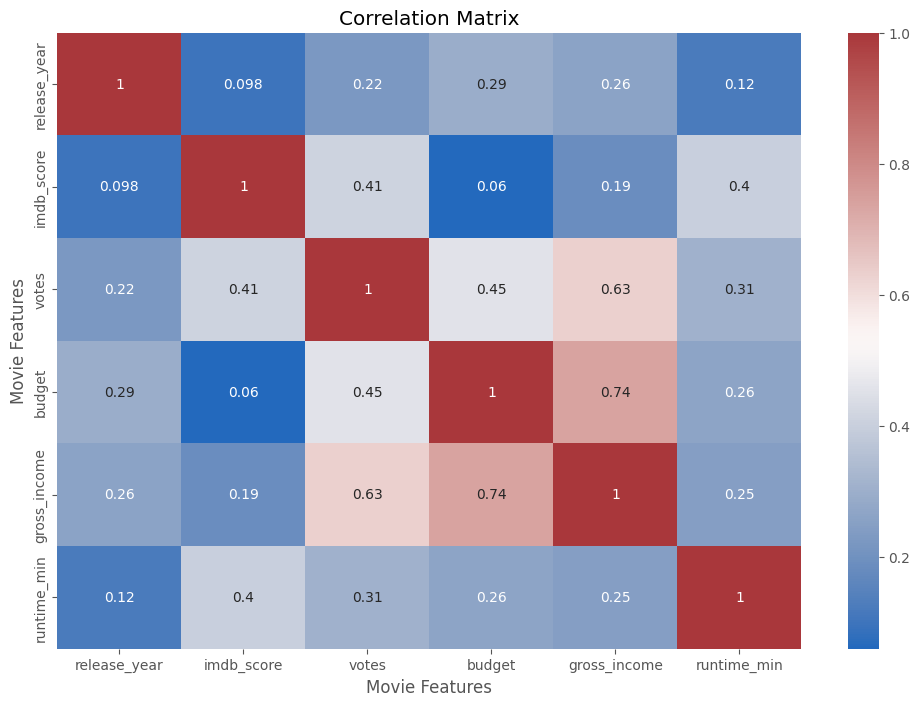

In [38]:
# Using just pearson method
correlation_matrix = df_numeric_values.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

## Analyzing some data from the numerical columns only

#### **Average Budget Distribution by Movie Genres**

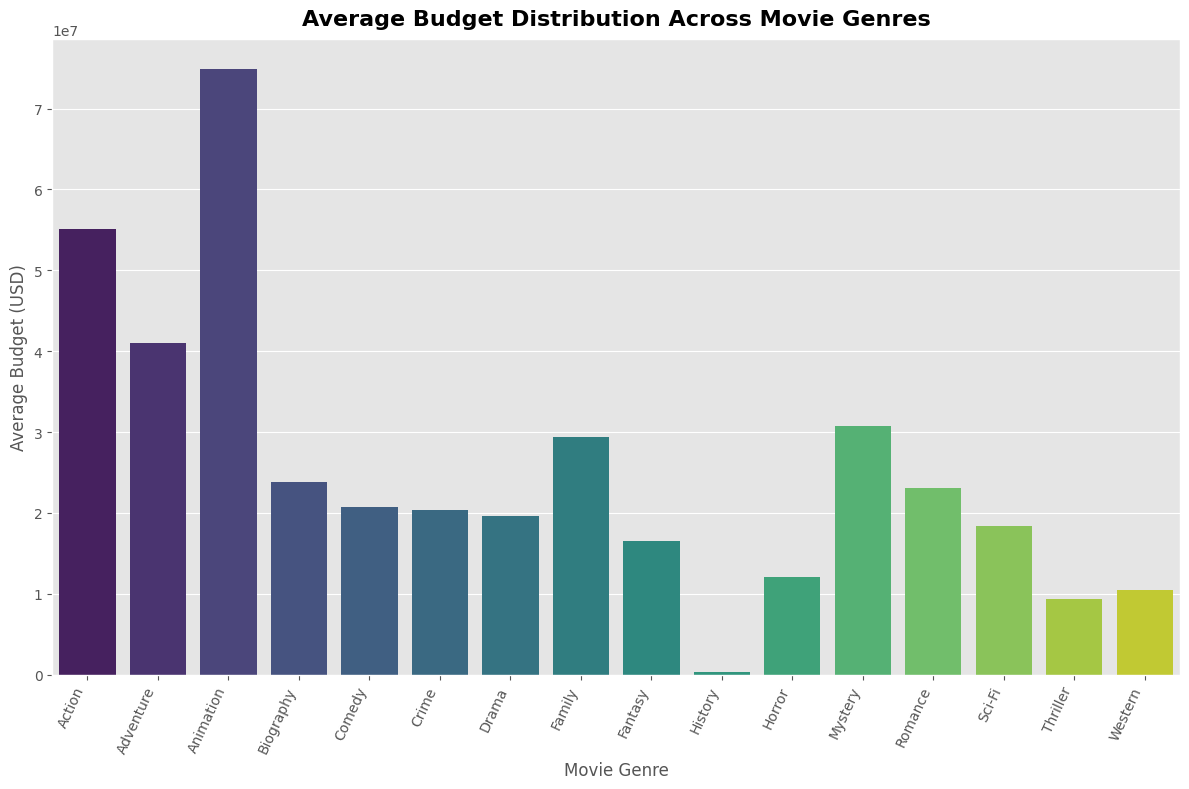

In [39]:
average_budget_by_genre = movies_df.groupby('genre')['budget'].mean()

sns.barplot(x=average_budget_by_genre.index, 
            y=average_budget_by_genre.values, 
            hue=average_budget_by_genre.index,
            palette='viridis',
            legend=False)

plt.title('Average Budget Distribution Across Movie Genres', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Movie Genre')
plt.ylabel('Average Budget (USD)')
plt.xticks(rotation=65, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

This bar plot clearly demonstrates that **genre is the dominant factor** determining a movie's average production budget.

***Key Insights:***

1.  **Top Spenders:** **Animation** stands out significantly as the highest-budget genre, with averages exceeding $70 million USD. **Action** and **Adventure** also require substantial budgets, confirming their high-cost nature.
2.  **Mid-Range Cluster:** **Drama, Comedy, Crime, and Biography** cluster closely with average budgets around the $20 million mark, highlighting similar resource allocation for narrative-focused films.
3.  **Low-Budget Niche:** **Horror** consistently requires one of the lowest average budgets (approx. $12 million), demonstrating that success in this genre relies less on vast financial investment.

#### **IMDb Rating Distribution**

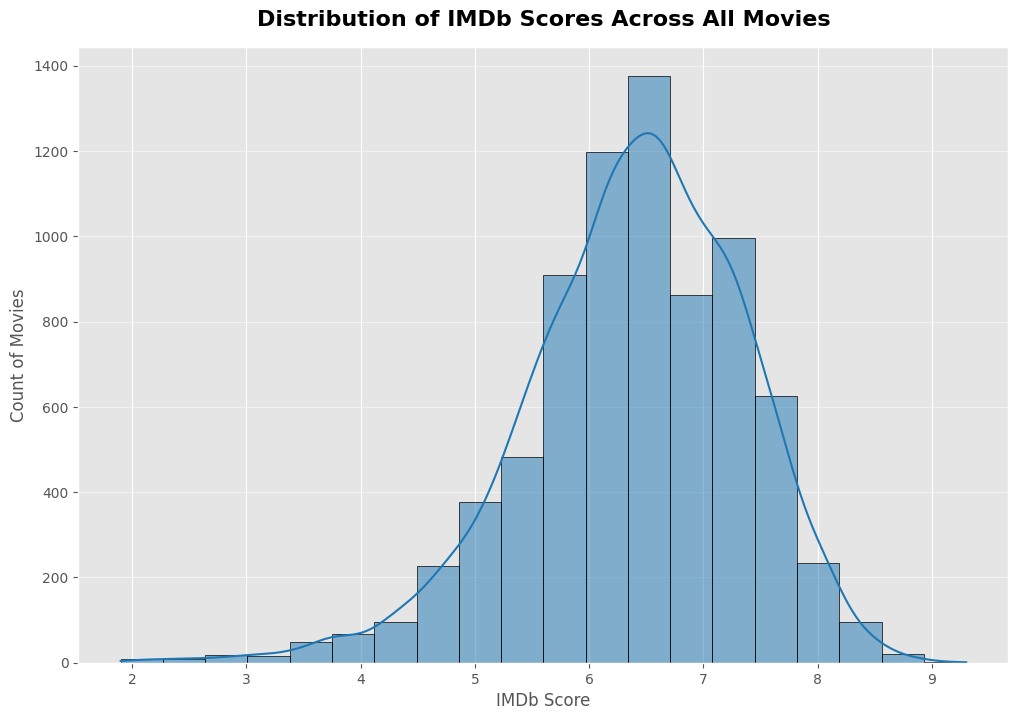

In [40]:
sns.histplot(movies_df['imdb_score'], 
             bins=20,
             kde=True, # kernel density estimate curve
             color='#1f77b4', 
             edgecolor='black')

plt.title('Distribution of IMDb Scores Across All Movies', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('IMDb Score')
plt.ylabel('Count of Movies')
plt.grid(axis='y', alpha=0.5)
plt.show()

This histogram visualizes the frequency distribution of IMDb scores across the entire dataset. The analysis provides key context for understanding movie quality perception.

***Key Insights:***

1.  **Near-Normal Distribution:** The data follows a general **bell curve** shape, indicating a distribution that is close to normal. Most scores are concentrated around the center.
2.  **Central Tendency:** The majority of films score within a tight range, primarily between **5.5 and 7.5**.
3.  **Peak Frequency (Mode):** The highest frequency (the mode) occurs between **6.5 and 7.0**. This suggests that the typical movie in this dataset is rated just below 'good'.
4.  **Imputation Justification:** The presence of this distinct central cluster justifies the earlier decision to use the **median** for imputing missing IMDb scores. Since the distribution is not heavily skewed, the median is a highly stable and representative value for the central tendency.
5.  **Extremes:** Very few movies receive extremely low scores (below 3.0) or exceptionally high scores (above 8.5), confirming that extreme ratings are rare.

#### **Relationship between Votes and Gross Income (Logarithmic Scale)**

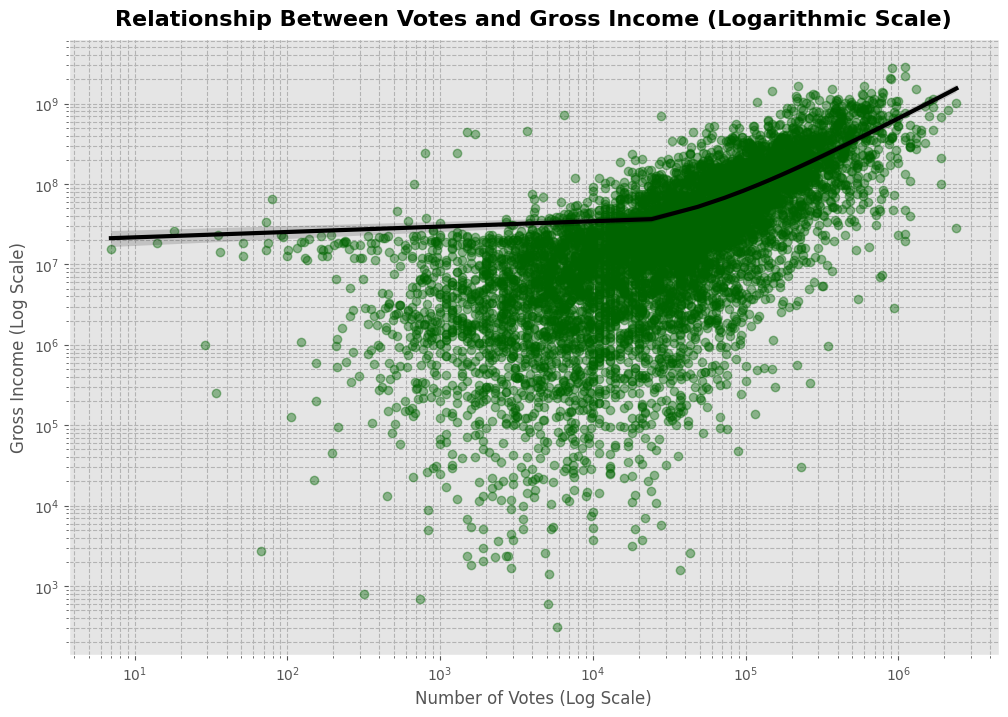

In [ ]:
sns.regplot(x='votes', 
            y='gross_income', 
            data=movies_df, 
            scatter_kws={'alpha': 0.4, 'color': 'darkgreen'}, 
            line_kws={'color': 'black', 'linewidth': 3})

plt.title('Relationship Between Votes and Gross Income (Logarithmic Scale)', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('Gross Income (Log Scale)')

#Set both axes to a logarithmic scale to handle the wide range of financial data
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

This logarithmic plot validates the strong positive correlation (Spearman $\approx 0.72$) between audience engagement (`Votes`) and financial success (`Gross Income`).

***Key Insights:***

1.  **Strong Trend:** The regression line confirms a powerful monotonic relationship: as audience engagement increases, revenue consistently rises across the entire scale.
2.  **Critical Threshold:** There is a notable **inflection point** on the regression line around **$10^4$ (10,000) votes**. This suggests that achieving this level of audience engagement is often the **minimum prerequisite** for a movie to transition from low-to-mid-tier revenue to high-tier revenue.

#### **Distribution of Gross Income by Rating**

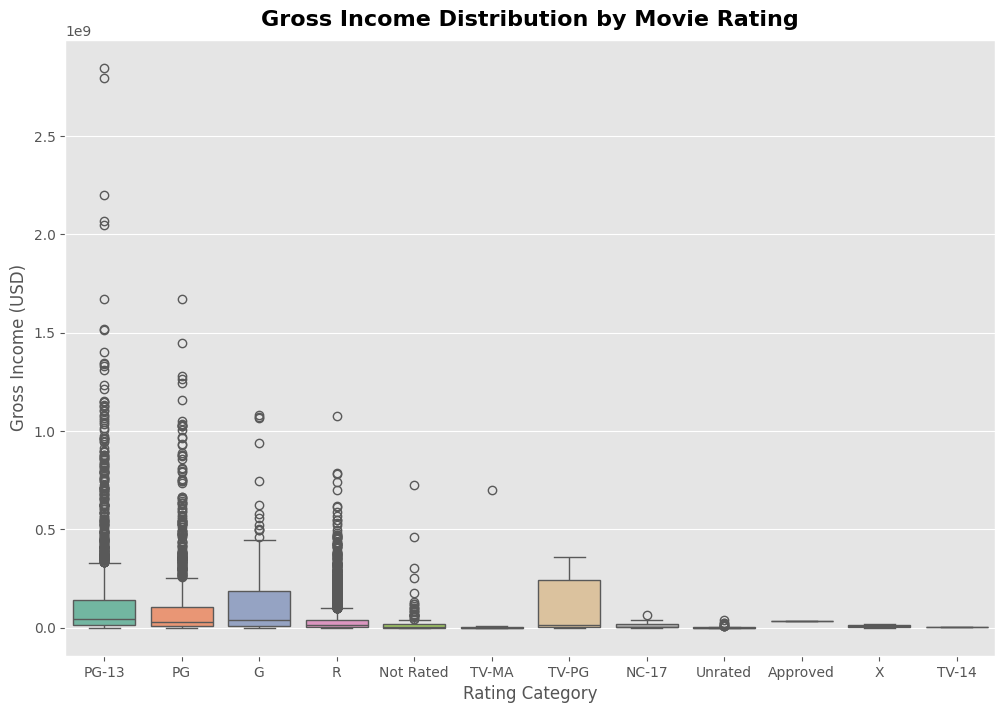

In [42]:
sns.boxplot(x='rating', 
            y='gross_income', 
            data=movies_df.sort_values(by='gross_income', ascending=False),
            hue='rating',
            palette='Set2')

plt.title('Gross Income Distribution by Movie Rating', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Rating Category')
plt.ylabel('Gross Income (USD)')
plt.show()

This Box Plot compares the distribution and variance of `Gross Income` across different `Rating Categories`. Due to the nature of revenue data, the graph is heavily influenced by high-value outliers.

***Key Insights:***

1.  **Top Median Performers:** The highest median gross incomes (represented by the line inside the box) are consistently found in family-friendly or broadly targeted categories: **PG-13, PG, and G**.
2.  **Financial Powerhouse (PG-13):** **PG-13** shows one of the largest box range and the highest density of high-revenue films, demonstrating that this rating category typically captures the largest block of financially successful movies.
3.  **Outlier Presence:** High-grossing outliers (the circles above the whiskers) are present across most major categories (**PG-13, PG, G, R**), confirming that blockbusters can emerge from any of these categories, but they are most common in **PG-13** films.
4.  **R-Rated Films:** While the R-rated category has a slightly lower median income compared to PG-13 and PG, it still produces significant high-grossing films, indicating its strong market presence despite viewing restrictions.
5.  **Small Categories:** Ratings like **NC-17, and X** have very small boxes or sparse data, reflecting smaller sample sizes or significantly lower market viability for general box office success.

The data strongly suggests that **PG-13** is the most commercially viable rating category for minimizing risk while maximizing the potential for extremely high revenue.

#### **Budget Trends Over Time**

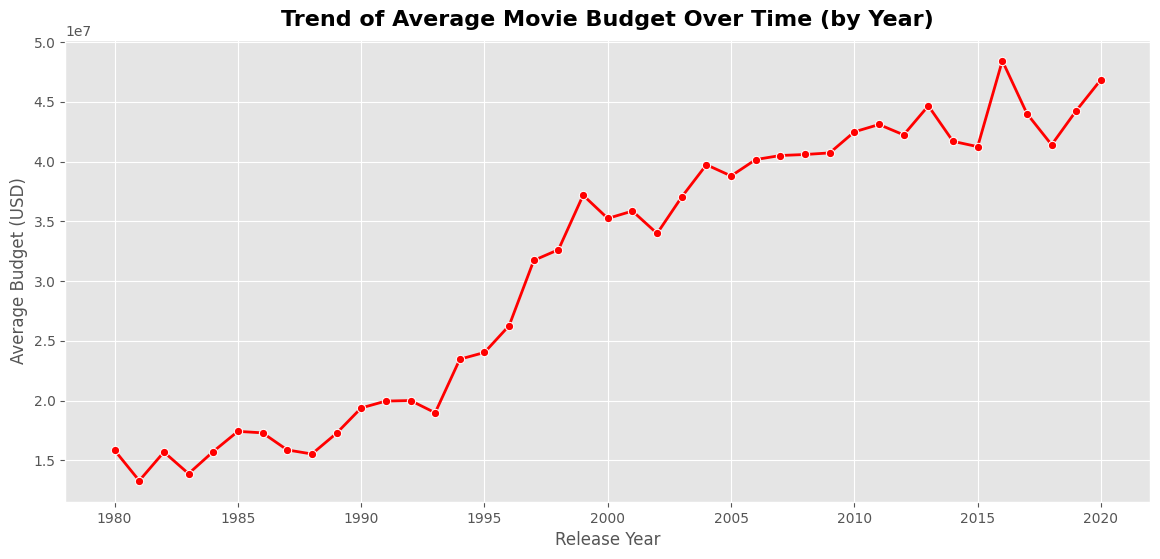

In [43]:
median_budget_per_year = movies_df.groupby('release_year')['budget'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='release_year', 
             y='budget', 
             data=median_budget_per_year, 
             marker='o', # Adds circles at each data point
             color='red', 
             linewidth=2)

plt.title('Trend of Average Movie Budget Over Time (by Year)', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Release Year')
plt.ylabel('Average Budget (USD)')
plt.show()

This line plot visualizes the average movie budget per year, confirming a clear and sustained inflationary trend in film production costs over four decades.

***Key Insights:***

1.  **Sustained Growth:** There is an undeniable **long-term positive trend** in the average film budget from 1980 to 2020. This growth reflects general economic inflation, increased demand for special effects, higher actor salaries, and larger global marketing costs.
2.  **Early Growth (1980s - Mid-1990s):** Budgets show steady but moderate growth, transitioning from approximately $15 million USD in the early 80s to around $25 million USD by the mid-90s.
3.  **Acceleration (Late 1990s - Early 2000s):** A significant spike occurs around the turn of the millennium, where the average budget surpasses the $35 million mark. This period aligns with the rise of CGI and the expansion of the global box office.
4.  **Plateau and Volatility (2005 - 2015):** The growth stabilizes somewhat, with the average budget hovering between $40 million and $45 million. This indicates a period where major studios maintained high, consistent spending levels.
5.  **Peak Spending and Recent Trend:** The chart shows a notable peak around **2016-2017** (nearing $50 million), followed by a slight dip and stabilization by 2020.

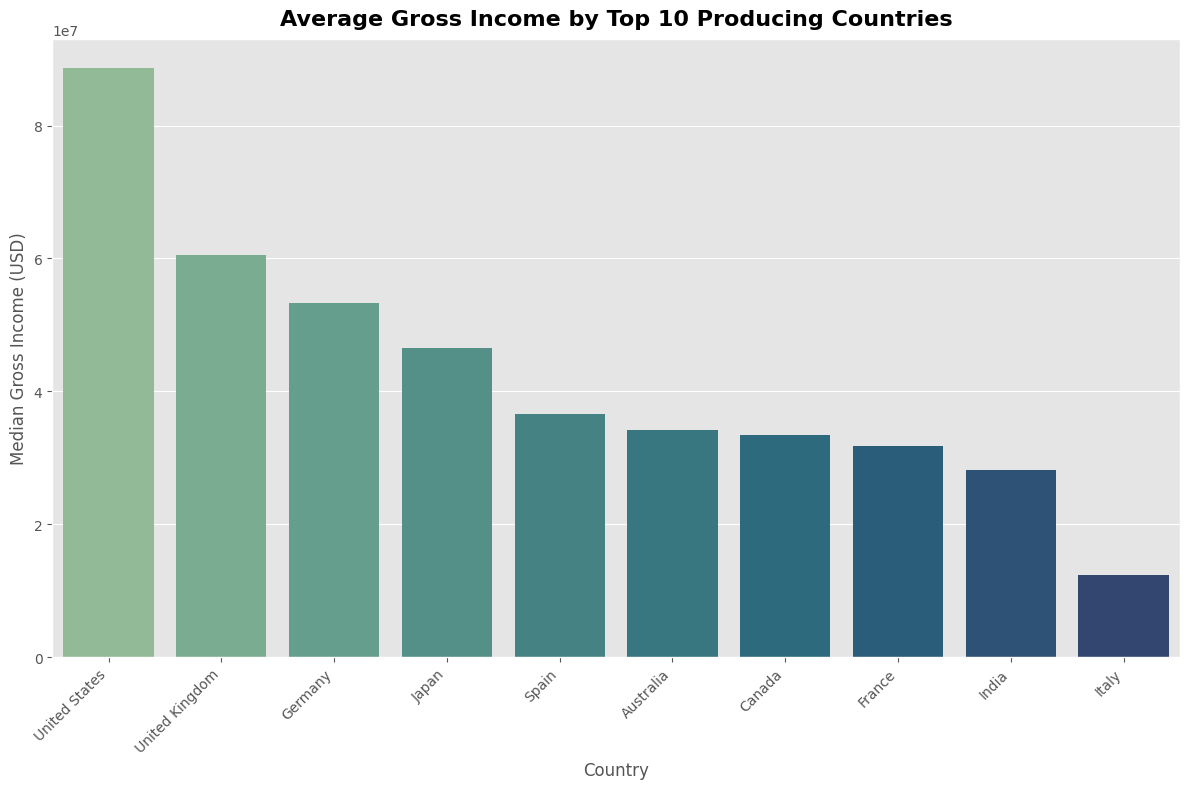

In [ ]:
top_countries = movies_df['country'].value_counts().nlargest(10).index
country_median_gross = movies_df[movies_df['country'].isin(top_countries)].groupby('country')['gross_income'].mean().sort_values(ascending=False).reset_index()

sns.barplot(x='country', 
            y='gross_income', 
            data=country_median_gross, 
            hue='country', 
            palette='crest',
            legend=False)

plt.title('Average Gross Income by Top 10 Producing Countries', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Country')
plt.ylabel('Average Gross Income (USD)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.tight_layout()
plt.show()

This bar plot compares the **average gross income** generated by films from the top 10 most represented countries in the dataset.

Key Insights:

1.  **United States Dominance:** The **United States** clearly leads by a significant margin, with the highest average gross income by a substantial amount (over $85 million USD). This reflects its massive domestic market size and its role as the primary exporter of high-budget, high-revenue films globally.
2.  **Major International Markets:** The **United Kingdom** and **Germany** hold the second and third spots, respectively. Their high averages indicate their strong filmmaking infrastructure and access to large markets, making them major players in global revenue generation.
3.  **Tiered Structure:** The remaining countries, including **Japan, Spain, Australia, Canada, and France**, fall into a second tier where the average gross income is clustered between approximately $30 million and $45 million. This shows a strong, but less dominant, financial footprint compared to the top three.
4.  **Lower End:** Countries like **India** and **Italy** show significantly lower average gross incomes, which may be due to differences in market size, currency conversion (as the data is likely standardized to USD), or the prevalence of films made for specific local markets.

## Correlation with all the columns

Back to the correlations, now I'm going to visualize them using all the columns.

In [44]:
# Creating new df with all columns numeric
movies_df_numerized = movies_df.copy()

for column in movies_df_numerized.columns:
    if movies_df_numerized[column].dtype == 'object':
        movies_df_numerized[column] = movies_df_numerized[column].astype('category')
        movies_df_numerized[column] = movies_df_numerized[column].cat.codes

In [45]:
movies_df_numerized

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
5445,532,5,0,2009,7.8,1100000.0,1154,1777,2331,55,237000000,2847246203,2254,162.0
7445,534,5,0,2019,8.4,903000.0,161,743,2238,55,356000000,2797501328,1605,181.0
3045,6892,5,6,1997,7.8,1100000.0,1154,1777,1594,55,200000000,2201647264,2254,194.0
6663,5140,5,0,2015,7.8,876000.0,1124,2549,523,55,245000000,2069521700,1538,138.0
7244,535,5,0,2018,8.4,897000.0,161,743,2238,55,321000000,2048359754,1605,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3356,6,4,2000,6.5,5200.0,729,1122,2316,54,17000000,1400,478,103.0
7625,6716,6,4,2019,5.7,320.0,2543,2564,1912,55,17000000,790,2311,104.0
7580,4660,3,5,2019,5.2,735.0,1443,2202,2275,55,15000000,682,1993,93.0
2417,3402,6,6,1993,7.3,5100.0,33,1717,2560,27,11900000,596,796,134.0


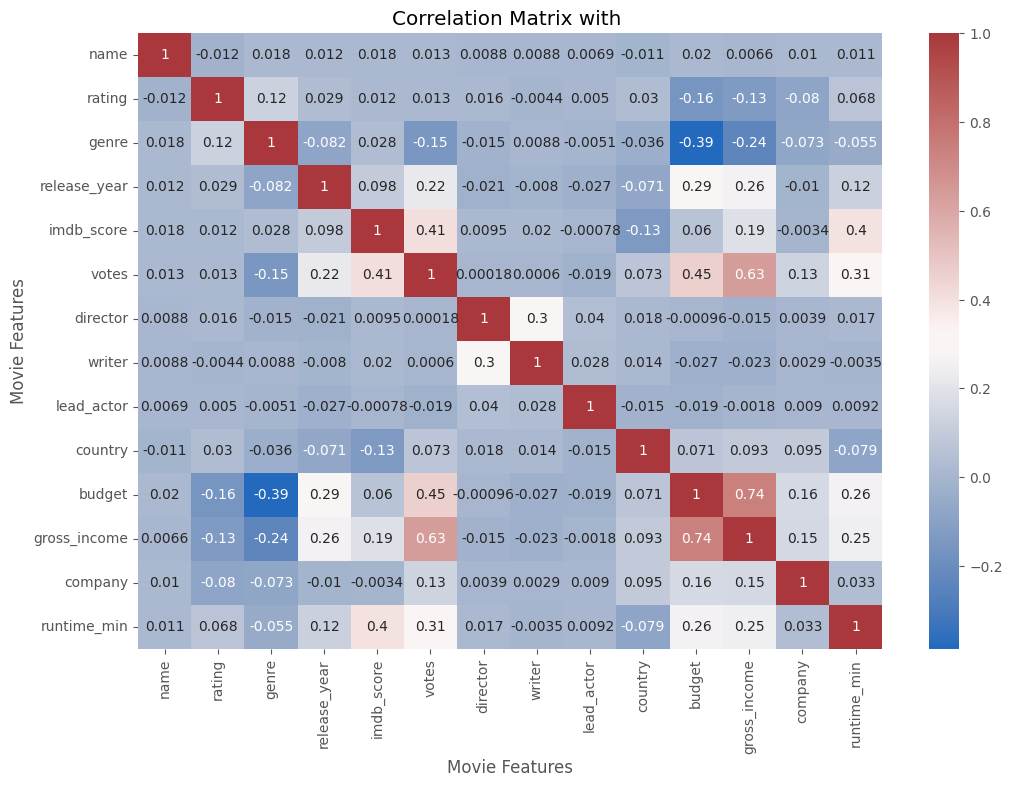

In [46]:
correlation_matrix = movies_df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title('Correlation Matrix with ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [47]:
movies_df_numerized.corr(method='pearson')

,name,rating,genre,release_year,imdb_score,votes,director,writer,lead_actor,country,budget,gross_income,company,runtime_min
name,1.000000,-0.012353,0.018200,0.011998,0.017565,0.012769,0.008798,0.008752,0.006889,-0.010736,0.019974,0.006567,0.010089,0.010932
rating,-0.012353,1.000000,0.124330,0.029456,0.011821,0.012630,0.016280,-0.004422,0.004980,0.029643,-0.163166,-0.129970,-0.079557,0.067998
genre,0.018200,0.124330,1.000000,-0.082320,0.028468,-0.148681,-0.015186,0.008827,-0.005068,-0.036235,-0.385709,-0.237818,-0.072658,-0.054940
release_year,0.011998,0.029456,-0.082320,1.000000,0.097684,0.222998,-0.020526,-0.007989,-0.027480,-0.070619,0.292989,0.260053,-0.010057,0.120427
imdb_score,0.017565,0.011821,0.028468,0.097684,1.000000,0.409625,0.009469,0.019542,-0.000782,-0.134131,0.060469,0.186971,-0.003428,0.398678
votes,0.012769,0.012630,-0.148681,0.222998,0.409625,1.000000,0.000179,0.000602,-0.019360,0.073446,0.454912,0.632070,0.131567,0.309502
director,0.008798,0.016280,-0.015186,-0.020526,0.009469,0.000179,1.000000,0.299266,0.040165,0.017862,-0.000963,-0.014936,0.003881,0.017490
writer,0.008752,-0.004422,0.008827,-0.007989,0.019542,0.000602,0.299266,1.000000,0.028372,0.013875,-0.026642,-0.023130,0.002880,-0.003542
lead_actor,0.006889,0.004980,-0.005068,-0.027480,-0.000782,-0.019360,0.040165,0.028372,1.000000,-0.015197,-0.018775,-0.001801,0.008983,0.009237
country,-0.010736,0.029643,-0.036235,-0.070619,-0.134131,0.073446,0.017862,0.013875,-0.015197,1.000000,0.071232,0.092952,0.094936,-0.078880


Looking only at correlations **greater than 0.4** now using all columns

In [48]:
correlation_matrix = movies_df_numerized.corr(method='pearson')

correlation_series = correlation_matrix.unstack().sort_values(ascending=False)

high_correlation_pairs = correlation_series[(correlation_series >= 0.4) & (correlation_series < 1.0) ]

high_correlation_df = high_correlation_pairs.to_frame(name='Correlation')
mask = high_correlation_df.index.get_level_values(0) < high_correlation_df.index.get_level_values(1)
final_results = high_correlation_df[mask]

print("High Correlation Pairs:")
print(final_results)

High Correlation Pairs:
                           Correlation
budget       gross_income     0.737147
gross_income votes            0.632070
budget       votes            0.454912
imdb_score   votes            0.409625


**Final Correlation Summary**

The comprehensive correlation analysis, conducted using all available columns (after numerical encoding of categorical features), reinforces the initial findings and highlights key relationships:

Primary Financial Drivers (Correlation $\geq 0.6$):

1.  **`budget` vs. `gross_income` (0.737147):** This remains the strongest linear correlation in the entire dataset. It strongly confirms that **higher budgets directly and linearly translate into higher gross revenues**—a fundamental principle in the film industry.
2.  **`gross_income` vs. `votes` (0.632070):** This relationship is the second strongest. It indicates that movies with **higher audience engagement and popularity (votes)** are significantly more likely to achieve high gross income.

**Secondary Influencers (Correlation $\geq 0.4$):**

* **`budget` vs. `votes` (0.454912):** There is a moderate relationship suggesting that films with larger budgets also tend to attract a higher volume of audience votes, indicating higher visibility and engagement.
* **`imdb_score` vs. `votes` (0.409625):** This correlation shows that **films with higher ratings (scores) generally receive more votes**. This connection is logical, as popular movies tend to be widely rated.

**Conclusion on Encoded Variables:**

Crucially, the numerical encoding of categorical features like `genre`, `director`, `writer`, and `company` **did not introduce any new strong correlations** (above 0.4) that would displace the importance of `budget` or `votes`. This confirms that **financial investment** and **audience engagement** are the main predictors of financial performance in this dataset.